In [6]:
import numpy as np
import matplotlib.pyplot as plt

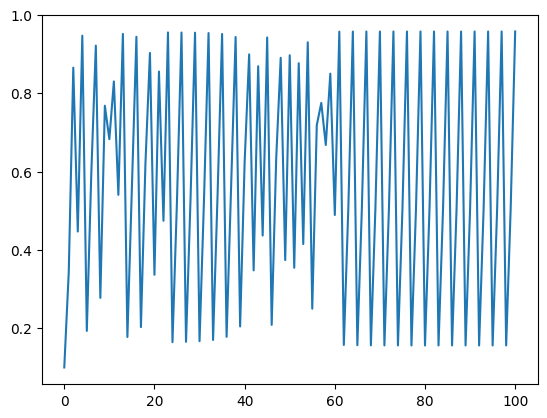

In [17]:
# Simulation parameters
#
# Control parameter of the map: A period-3 cycle
r = 3.83
# Set up an array of iterates and set the initital condition
x = [0.1]
# The number of iterations to generate
N = 100

# The main loop that generates iterates and stores them
for n in range(0, N):
    # at each iteration calculate x_n+1
    # and append to list x
    x.append(r*x[n]*(1.-x[n]))
    

plt.plot(np.arange(0, N+1), x)
plt.show()

#### Advanced example: Turing patterns (Reaction diffusion)

In [19]:
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005

size = 100  # size of the 2D grid
dx = 2.0 / size  # space step

T = 15.0  # total time
dt = 0.001  # time step
n = int(T / dt)  # number of iterations

# generate some random noise as initial condition
U = rng.random((size, size))  # concentration of substance favoring pigmentation
V = rng.random((size, size))  # reacting substance that impedes pigmentation 

In [20]:
def laplacian(Z):
    Ztop = Z[0:-2, 1:-1]
    Zleft = Z[1:-1, 0:-2]
    Zbottom = Z[2:, 1:-1]
    Zright = Z[1:-1, 2:]
    Zcenter = Z[1:-1, 1:-1]
    return (Ztop + Zleft + Zbottom + Zright -
            4 * Zcenter) / dx**2

def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

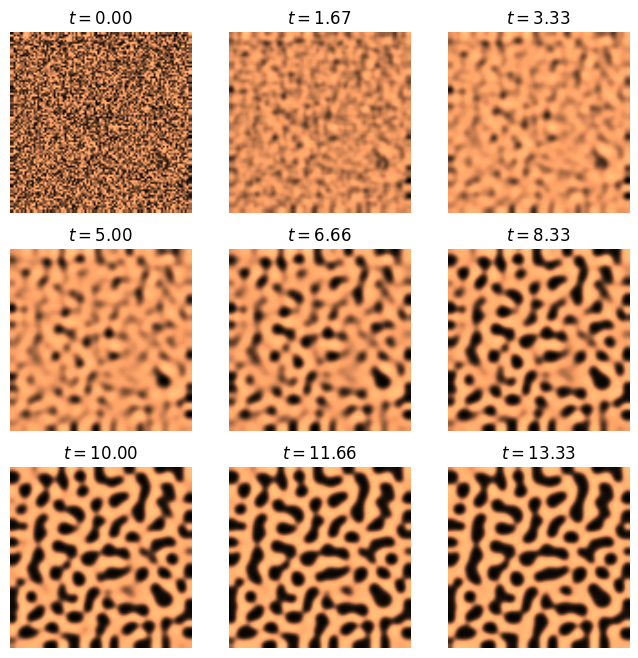

In [21]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
step_plot = n // 9
# We simulate the PDE with the finite difference
# method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    # We update the variables.
    U[1:-1, 1:-1], V[1:-1, 1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k),\
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]

    # We plot the state of the system at
    # 9 different times.
    if i % step_plot == 0 and i < 9 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')